In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2

from PIL import Image

from tensorflow import keras
import tensorflow.keras.layers as kl

### Data

In [20]:
from keras.preprocessing.image import ImageDataGenerator, load_img

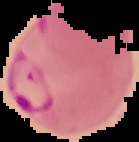

In [21]:
load_img("Malarial Cell Image Data\cell_images\Parasitized\C37BP2_thinF_IMG_20150620_133238a_cell_97.png")

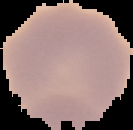

In [22]:
load_img(r"Malarial Cell Image Data\cell_images\Uninfected\C2NThinF_IMG_20150604_115238_cell_138.png")

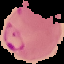

In [23]:
load_img("Malarial Cell Image Data\cell_images\Parasitized\C37BP2_thinF_IMG_20150620_133238a_cell_97.png", target_size=[64, 64])

In [24]:
os.environ["KERAS_BACKEND"] = "tensorflow"
np.random.seed(222)

In [25]:
img_dir = "Malarial Cell Image Data/malarial_cell_image_data/cell_images/"
size = 64
dataset = []
label = []

In [26]:
parasitized_img = os.listdir(img_dir+"Parasitized")
len(parasitized_img)

13780

In [27]:
for i, img in enumerate(parasitized_img):
    if(img.split(".")[1] == "png"):
        image = cv2.imread(img_dir+"Parasitized/"+img)
        image = Image.fromarray(image, "RGB")
        image = image.resize((size, size))
        dataset.append(np.array(image))
        label.append(0)

In [28]:
uninfected_img = os.listdir(img_dir+"Uninfected")
len(uninfected_img)

13780

In [29]:
for i, img in enumerate(uninfected_img):
    if(img.split(".")[1] == "png"):
        image = cv2.imread(img_dir+"Uninfected/"+img)
        image = Image.fromarray(image, "RGB")
        image = image.resize((size, size))
        dataset.append(np.array(image))
        label.append(1)

In [30]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain, xtest, ytrain, ytest = train_test_split(dataset, to_categorical(np.array(label)), test_size=0.2, random_state=11)

### CNN Model Architecture

In [31]:
inp_shape = (size, size, 3)

inp = kl.Input(shape = inp_shape)

conv1 = kl.Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "same")(inp)
pool1 = kl.MaxPool2D(pool_size=(2,2))(conv1)
norm1 = kl.BatchNormalization(axis = -1)(pool1)
drop1 = kl.Dropout(rate = 0.2)(norm1)

conv2 = kl.Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "same")(drop1)
pool2 = kl.MaxPool2D(pool_size=(2,2))(conv2)
norm2 = kl.BatchNormalization(axis = -1)(pool2)
drop2 = kl.Dropout(rate = 0.2)(norm2)

conv3 = kl.Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "same")(drop2)
pool3 = kl.MaxPool2D(pool_size=(2,2))(conv3)
norm3 = kl.BatchNormalization(axis = -1)(pool3)
drop3 = kl.Dropout(rate = 0.2)(norm3)

flat = kl.Flatten()(drop3)

hidden1 = kl.Dense(512, activation = "relu")(flat)
norm4 = kl.BatchNormalization(axis = -1)(hidden1)
drop4 = kl.Dropout(rate = 0.2)(norm4)

hidden2 = kl.Dense(512, activation = "relu")(drop4)
norm5 = kl.BatchNormalization(axis = -1)(hidden2)
drop5 = kl.Dropout(rate = 0.2)(norm5)

out = kl.Dense(2, activation = "sigmoid")(drop5)

In [32]:
model = keras.Model(inputs = inp, outputs = out)
model.compile(optimizer = "adam", loss='binary_crossentropy', metrics = ["accuracy"])

In [33]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

In [34]:
history = model.fit(np.array(xtrain), ytrain, batch_size=64, verbose=2, epochs=50, validation_split=0.1, shuffle=False)

Epoch 1/50
311/311 - 48s - loss: 0.5201 - accuracy: 0.7625 - val_loss: 0.4399 - val_accuracy: 0.8848 - 48s/epoch - 154ms/step
Epoch 2/50
311/311 - 44s - loss: 0.2113 - accuracy: 0.9276 - val_loss: 0.4970 - val_accuracy: 0.8766 - 44s/epoch - 143ms/step
Epoch 3/50
311/311 - 44s - loss: 0.1711 - accuracy: 0.9416 - val_loss: 0.2065 - val_accuracy: 0.9338 - 44s/epoch - 141ms/step
Epoch 4/50
311/311 - 44s - loss: 0.1509 - accuracy: 0.9495 - val_loss: 0.2261 - val_accuracy: 0.9406 - 44s/epoch - 140ms/step
Epoch 5/50
311/311 - 47s - loss: 0.1369 - accuracy: 0.9532 - val_loss: 0.2025 - val_accuracy: 0.9374 - 47s/epoch - 150ms/step
Epoch 6/50
311/311 - 44s - loss: 0.1283 - accuracy: 0.9569 - val_loss: 0.1443 - val_accuracy: 0.9510 - 44s/epoch - 141ms/step
Epoch 7/50
311/311 - 44s - loss: 0.1164 - accuracy: 0.9593 - val_loss: 0.2058 - val_accuracy: 0.9379 - 44s/epoch - 140ms/step
Epoch 8/50
311/311 - 44s - loss: 0.1088 - accuracy: 0.9617 - val_loss: 0.1699 - val_accuracy: 0.9415 - 44s/epoch - 141

In [35]:
print("Test Accuracy {:.2f}%".format(model.evaluate(np.array(xtest), np.array(ytest))[1]*100))

173/173 [==============================] - 4s 23ms/step - loss: 0.2566 - accuracy: 0.9563
Test Accuracy 95.63%


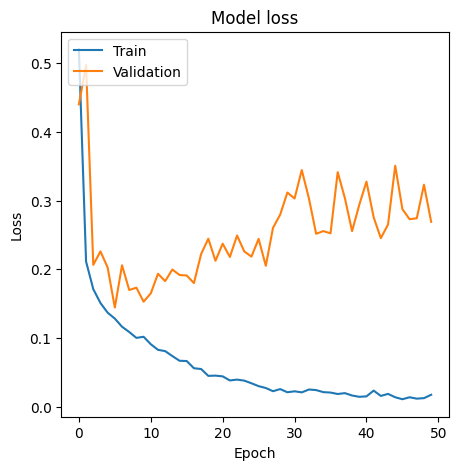

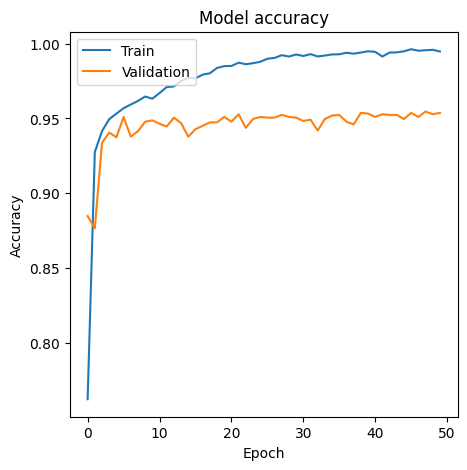

In [36]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()